In [ ]:
# Name: Mohit Kumar Rao
# Course:AIML

In [17]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [18]:
# Define the data directories
train_data_dir = 'dataset/train'
test_data_dir = 'dataset/test'

In [19]:
# Image dimensions
img_width, img_height = 224, 224

In [20]:
# Parameters for training and evaluation
epochs = 15
batch_size = 32
num_classes = 3

In [21]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data augmentation for testing set (only rescaling)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)


In [22]:
# Generate training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Generate testing data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


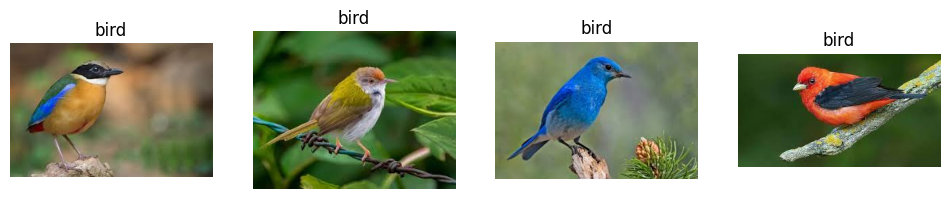

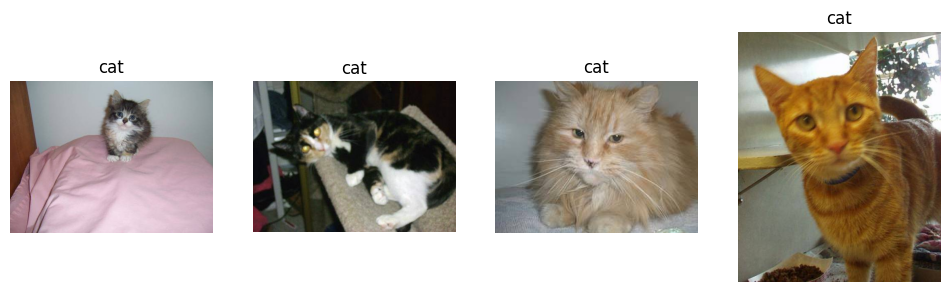

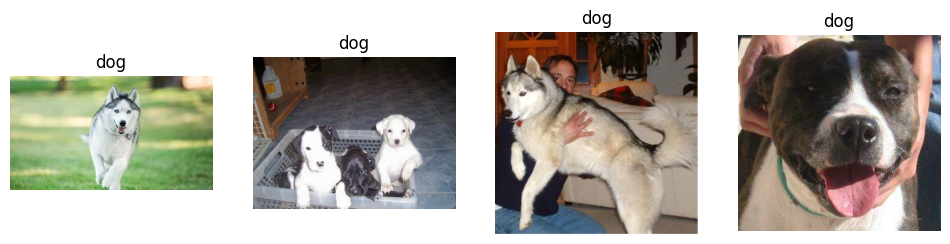

In [23]:
# Define the data directory
data_dir = 'dataset/train'
# Get class names
class_names = os.listdir(data_dir)

# Function to plot sample images
def plot_sample_images(class_name, data_dir, num_samples=4):
    class_dir = os.path.join(data_dir, class_name)
    file_names = os.listdir(class_dir)
    samples = np.random.choice(file_names, num_samples, replace=False)
    
    plt.figure(figsize=(12, 4))
    for i, file_name in enumerate(samples):
        img_path = os.path.join(class_dir, file_name)
        img = plt.imread(img_path)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.show()

# Show sample images from each class
for class_name in class_names:
    plot_sample_images(class_name, data_dir)

In [24]:
# Build a larger CNN model
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))



In [25]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 256)      